# My Basic Fake News Detector

### 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### 2. Reading and Merging Data

Data used for this project can be found at [this link](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv). It's composed of two csv files (one for the true news, other for the fake news), so they need to be merged

In [2]:
true_data = pd.read_csv("True.csv")
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_data = pd.read_csv("Fake.csv")
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Assign labels
true_data["label"] = "true"
true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [5]:
fake_data["label"] = "fake"
fake_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [6]:
# Merging and shuffing dataframes

data = pd.concat([true_data, fake_data])
data = data.sample(frac = 1).reset_index(drop=True)
data.head()

,title,text,subject,date,label
0,4 EASY TO UNDERSTAND REASONS My Ancestors Are ...,How many times have liberals used the argument...,left-news,"Oct 5, 2017",fake
1,"CUBA’S GETTING NUCLEAR Reactors From Putin, Wh...",As our limp-wristed President flies around on ...,Government News,"Oct 1, 2016",fake
2,WOW! BREAKING NEWS: Proof Obama LIED To Press…...,The most transparent administration in histor...,politics,"Nov 3, 2016",fake
3,U.S. Democrats challenge Republicans to conduc...,WASHINGTON (Reuters) - Wary Democrats on Thurs...,politicsNews,"February 16, 2017",true
4,Ex-Goldman banker Mnuchin installed as Treasur...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 13, 2017",true


### 3. Data Analysis

<AxesSubplot: xlabel='label', ylabel='Count'>

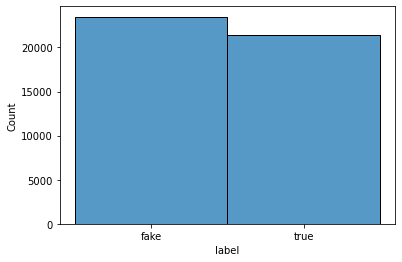

In [7]:
# check number of occurences of each class
sns.histplot(data=data, x="label")

### 4. Data Preparation (Using article text as training set)

In [8]:
# split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(data['text'], data["label"], test_size=0.2, random_state=7)

# initialising tf-idf vectoriser
tfidf_vectoriser=TfidfVectorizer(stop_words='english', max_df=0.7)

# fitting and transforming training set, transforming test set
tfidf_train = tfidf_vectoriser.fit_transform(x_train) 
tfidf_test = tfidf_vectoriser.transform(x_test)

### 5. Training and Evaluation (Passive-Agressive Classifier)

In [9]:
# training
pa_classifier = PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train,y_train)

# accuracy calculation
y_pred = pa_classifier.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.43%


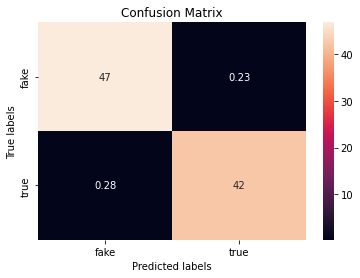

In [10]:
# plotting confusion matrix
cm = confusion_matrix(y_pred, y_test) * 0.01
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['fake', 'true']); ax.yaxis.set_ticklabels(['fake', 'true']) 
plt.show()

### 6. Training and Evaluation (Random Forest Classifier)

In [11]:
# training
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=5)
rf_classifier.fit(tfidf_train,y_train)

# accuracy calculation
y_pred = rf_classifier.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.16%


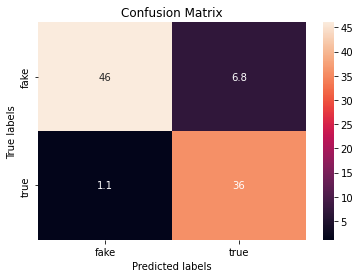

In [12]:
# plotting confusion matrix
cm = confusion_matrix(y_pred, y_test) * 0.01
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['fake', 'true']); ax.yaxis.set_ticklabels(['fake', 'true']) 
plt.show()

### 7. Training and Evaluation (Logistic Regression)

In [13]:
# training
lr_classifier = LogisticRegression()
lr_classifier.fit(tfidf_train,y_train)

# accuracy calculation
y_pred = lr_classifier.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.42%


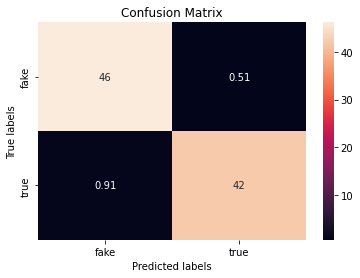

In [14]:
# plotting confusion matrix
cm = confusion_matrix(y_pred, y_test) * 0.01
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['fake', 'true']); ax.yaxis.set_ticklabels(['fake', 'true']) 
plt.show()